<a href="https://colab.research.google.com/github/DanielaRolon/World-war-ll/blob/main/World_war_ll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data sets source:
https://www.kaggle.com/datasets/usaf/world-war-ii

##Data Description

###Aerial Bombing Operations in World War II:


* Mission Date: Mission Date

* Theater of Operations: Area in which active military operations are carried out

* Country: Country that carries out mission or operation like the USA

* Air Force: Name or identification of air force unit such as 5AF

* Aircraft Series: Model or type of aircraft such as B24

* Call sign: Before the bomb attack, message, code, announcement or melody that is transmitted over the radio.

* Takeoff Base: Name of the takeoff airport

* Takeoff Location: Takeoff Location

* Takeoff Latitude: Latitude of takeoff region

* Takeoff Longitude: Longitude of takeoff region

* Target Country: Target country like Germany

* Target City: Target city like Berlin

* Target Type: target type like city area

* Target Industry: Target industry such as city or urban area.

* Target priority: Target priority as 1 (most)

* Target latitude: Target latitude

* Target Longitude: Target Longitude

* Weather conditions data description:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
import plotly.graph_objs as go # plotly graphical object
import os
import warnings
# ignore filters
warnings.filterwarnings("ignore")
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.

In [5]:
# Load the datasets
aerial_bombing = pd.read_csv("/content/Aerial Bombing.csv")

In [6]:
#Show the summary of whole dataset
aerial_bombing.shape

(178281, 46)

#Data cleaning

In [7]:
# drop unused columns
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']

In [8]:
# drop countries that are NaN
aerial = aerial_bombing[pd.isna(aerial_bombing.Country)==False]
# drop if target longitude is NaN
aerial = aerial[pd.isna(aerial['Target Longitude'])==False]
# Drop if takeoff longitude is NaN
aerial = aerial[pd.isna(aerial['Takeoff Longitude'])==False]

aerial.drop(drop_list, axis=1,inplace = True)


In [9]:
aerial = aerial[ aerial.iloc[:,8]!="4248"] # drop this takeoff latitude
aerial = aerial[ aerial.iloc[:,9]!=1355]   # drop this takeoff longitude

In [11]:
aerial.info()

,Mission Date,Theater of Operations,Country,Air Force,Aircraft Series,Callsign,Takeoff Base,Takeoff Location,Takeoff Latitude,Takeoff Longitude,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude
0,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SPADAFORA,NaN,NaN,NaN,38.22,15.37
2,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,COSENZA,NaN,NaN,NaN,39.27,16.25
3,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,GIOJA TAURO,NaN,NaN,NaN,38.43,15.90
8,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SCILLA,NaN,NaN,NaN,38.23,15.72
9,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,GIOJA TAURO,NaN,ARMAMENT AND ORDNANCE PLANTS,NaN,38.43,15.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178032,8/14/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SPADAFORA,NaN,NaN,NaN,38.22,15.37
178033,8/14/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,MILAZZO,NaN,NaN,NaN,38.20,15.25
178034,8/14/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,ORLANDO,NaN,NaN,NaN,38.15,14.73
178035,8/14/1943,MTO,GREAT BRITAIN,RAF,LIB,NaN,OUDNA,TUNISIA,36.649608,10.121936,GREECE,SAN GIOVANNI,NaN,NaN,NaN,38.22,15.22


##Data Visualization

###How many countries attack?

In [ ]:
aerial['Country'].value_counts()

,count
Country,
USA,1895
GREAT BRITAIN,544
NEW ZEALAND,102
SOUTH AFRICA,14


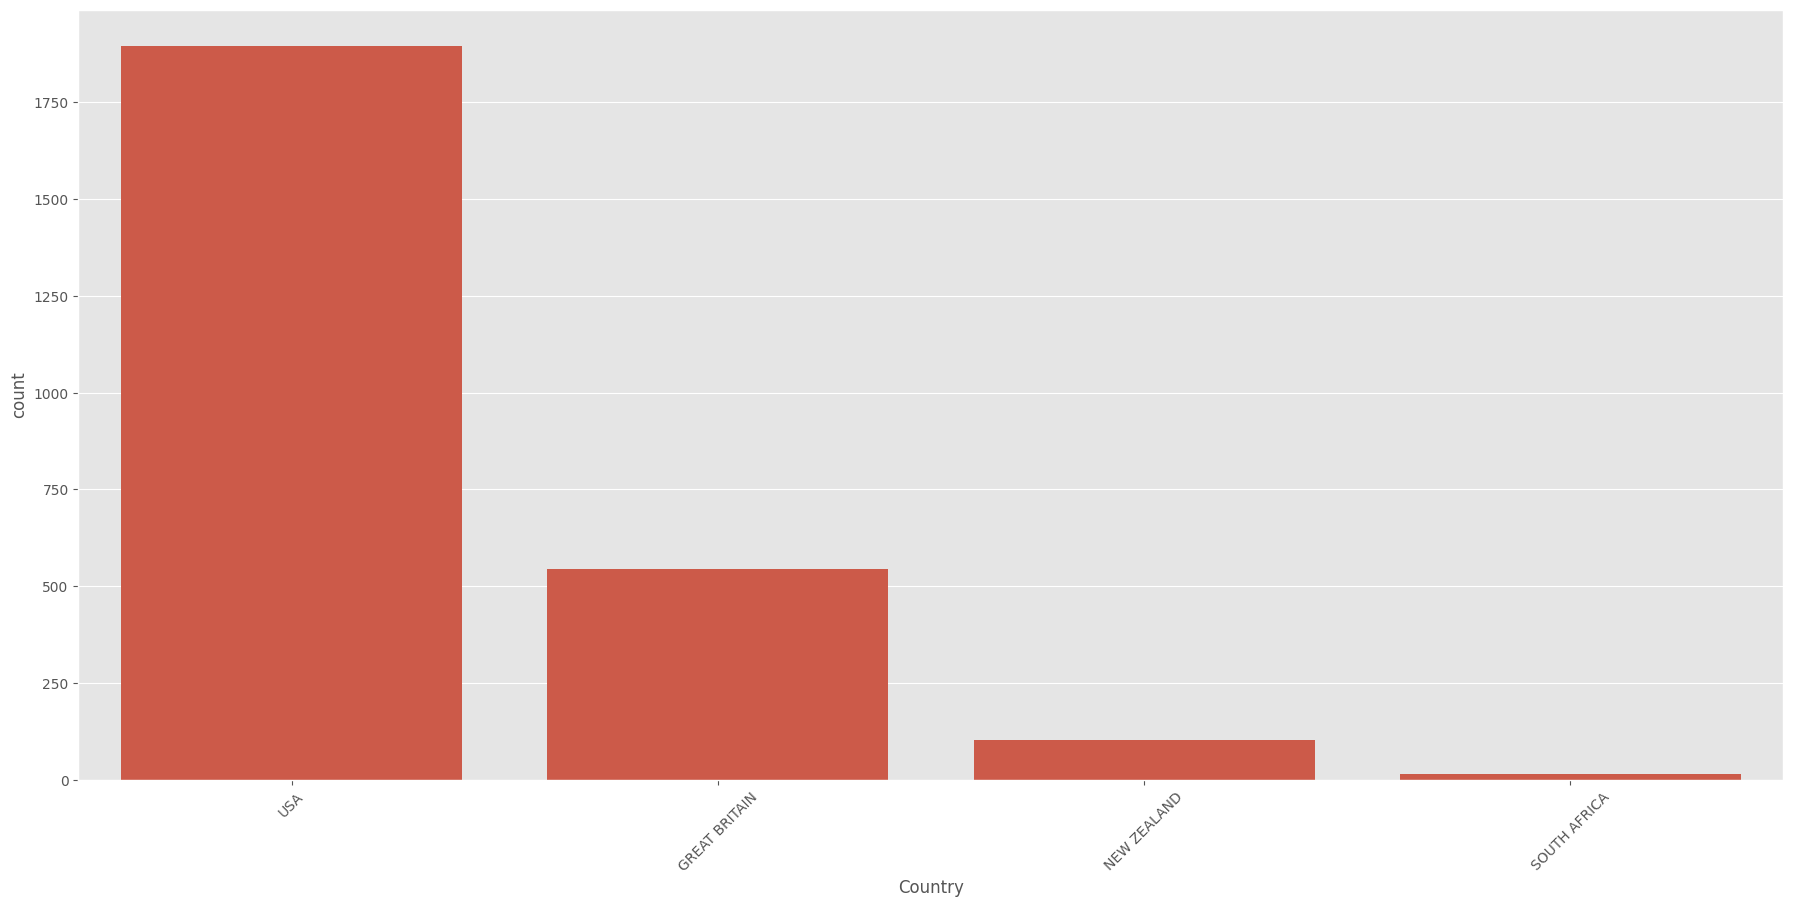

In [ ]:
# Create a bar plot
plt.figure(figsize=(22, 10))
sns.countplot(data=aerial, x='Country', order=aerial['Country'].value_counts().index)  # Ensure consistent ordering
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

###Main target countries

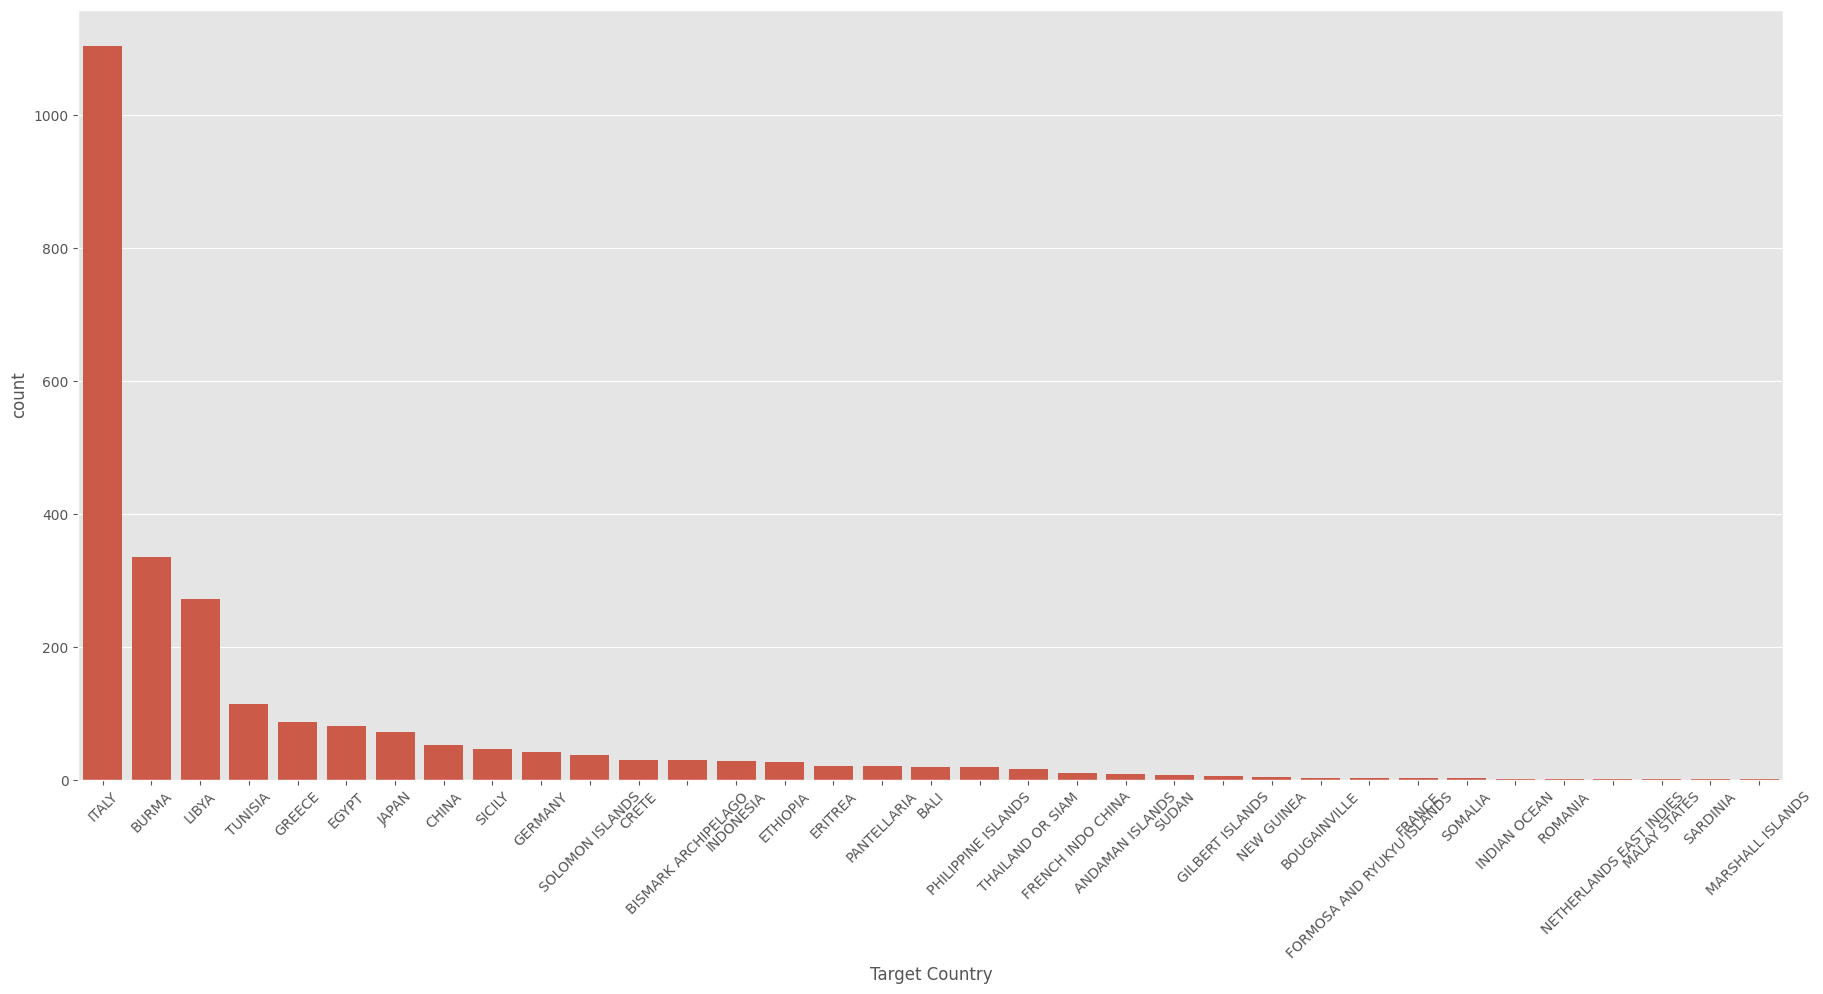

In [ ]:
# Create a bar plot
plt.figure(figsize=(22, 10))
sns.countplot(data=aerial, x='Target Country', order=aerial['Target Country'].value_counts().index)  # Ensure consistent ordering
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

###Top 10 aircraft series

In [ ]:
# Aircraft Series
data = aerial['Aircraft Series'].value_counts()
print(data[:10])
data = [go.Bar(
            x=data[:10].index,
            y=data[:10].values,
            hoverinfo = 'text',
            marker = dict(color = 'rgba(177, 14, 22, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    )]

layout = dict(
    title = 'Aircraft Series',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Aircraft Series
A36             990
B25             416
B24             337
BLEN            180
LIB             145
WELL            129
B17             119
PV-1 VENTURA     70
WHIT             32
HALI             18
Name: count, dtype: int64


###Take-off base locations (Attack countries)


In [17]:
# Assign colors based on country
colors = {
    "USA": "rgb(0,116,217)",
    "GREAT BRITAIN": "rgb(255,65,54)",
    "NEW ZEALAND": "rgb(133,20,75)",
    "SOUTH AFRICA": "rgb(255,133,27)"
}
aerial["color"] = aerial["Country"].map(colors)

# Create the scattergeo plot
data = [dict(
    type='scattergeo',
    lon=aerial['Takeoff Longitude'],
    lat=aerial['Takeoff Latitude'],
    hoverinfo='text',
    text="Country: " + aerial.Country + "<br>Takeoff Location: " + aerial["Takeoff Location"] + "<br>Takeoff Base: " + aerial['Takeoff Base'],
    mode='markers',
    marker=dict(
        sizemode='area',
        sizeref=1,
        size=10,
        line=dict(width=1, color="white"),
        color=aerial["color"],
        opacity=0.7
    )
)]

# Define the layout
layout = dict(
    title='Countries Take Off Bases',
    hovermode='closest',
    geo=dict(
        showframe=False,
        showland=True,
        showcoastlines=True,
        showcountries=True,
        countrywidth=1,
        projection=dict(type='mercator'),
        landcolor='rgb(225, 242, 239)',
        subunitwidth=1,
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        countrycolor="rgb(5, 5, 5)"
    )
)

# Create and show the figure
fig = go.Figure(data=data, layout=layout)
iplot(fig)

###Bombing routes
visualize the bombing routes, which country it takes off from which base and which countries and cities.

In [16]:
# Assign colors based on country
colors = {
    "USA": "rgb(0,116,217)",
    "GREAT BRITAIN": "rgb(255,65,54)",
    "NEW ZEALAND": "rgb(133,20,75)",
    "SOUTH AFRICA": "rgb(255,133,27)"
}
aerial["color"] = aerial["Country"].map(colors)

# Create the scattergeo plot for airports
airports = dict(
    type='scattergeo',
    lon=aerial['Takeoff Longitude'],
    lat=aerial['Takeoff Latitude'],
    hoverinfo='text',
    text="Country: " + aerial.Country + "<br>Takeoff Location: " + aerial["Takeoff Location"] + "<br>Takeoff Base: " + aerial['Takeoff Base'],
    mode='markers',
    marker=dict(
        size=5,
        color=aerial["color"],
        line=dict(width=1, color="white")
    )
)

# Create the scattergeo plot for targets
targets = dict(
    type='scattergeo',
    lon=aerial['Target Longitude'],
    lat=aerial['Target Latitude'],
    hoverinfo='text',
    text="Target Country: " + aerial["Target Country"] + "<br>Target City: " + aerial["Target City"],
    mode='markers',
    marker=dict(
        size=1,
        color="red",
        line=dict(width=0.5, color="red")
    )
)

# Create flight paths
flight_paths = []
for i in range(len(aerial)):
    flight_paths.append(
        dict(
            type='scattergeo',
            lon=[aerial.iloc[i]['Takeoff Longitude'], aerial.iloc[i]['Target Longitude']],
            lat=[aerial.iloc[i]['Takeoff Latitude'], aerial.iloc[i]['Target Latitude']],
            mode='lines',
            line=dict(width=0.7, color='black'),
            opacity=0.6
        )
    )

# Define the layout
layout = dict(
    title='Bombing Paths from Attacker Country to Target',
    hovermode='closest',
    geo=dict(
        showframe=False,
        showland=True,
        showcoastlines=True,
        showcountries=True,
        countrywidth=1,
        projection=dict(type='mercator'),
        landcolor='rgb(225, 242, 239)',
        subunitwidth=1,
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        countrycolor="rgb(5, 5, 5)"
    )
)

# Create and show the figure
fig = go.Figure(data=[airports, targets] + flight_paths, layout=layout)
iplot(fig)

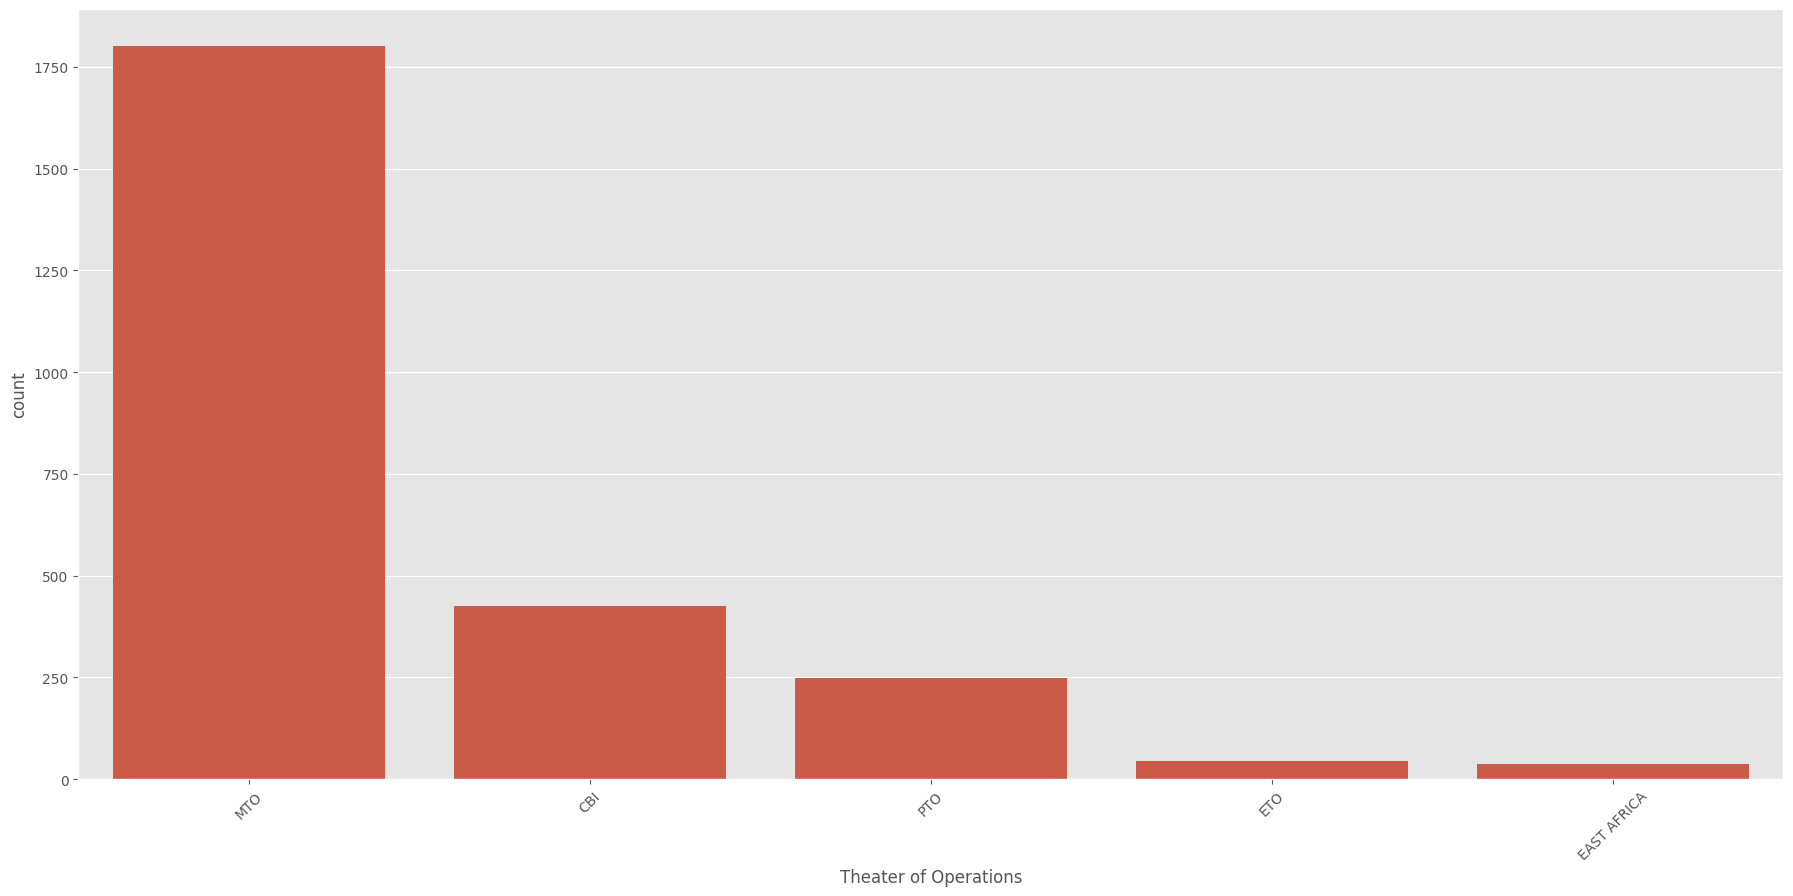

In [ ]:
#Theater of Operations
plt.figure(figsize=(22, 10))
sns.countplot(data=aerial, x='Theater of Operations', order=aerial['Theater of Operations'].value_counts().index)  # Ensure consistent ordering
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()